In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale=1.0) # giving light grey background and control font size in graphs

##### simple linear

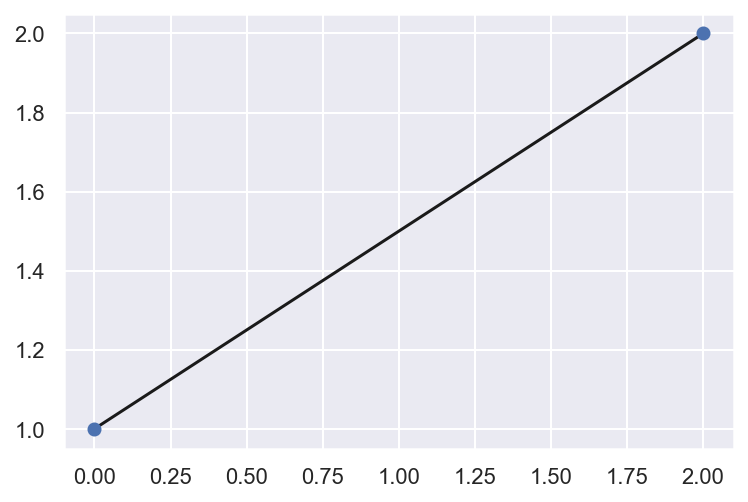

In [24]:
data = [[0,2],[1,2]] # [[],[]] is a matrix
plt.plot(data[0], data[1], 'k-') 
plt.plot(data[0], data[1], 'o')
plt.show()

In [25]:
np.transpose(data) 

array([[0, 1],
       [2, 2]])

##### simple linear

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


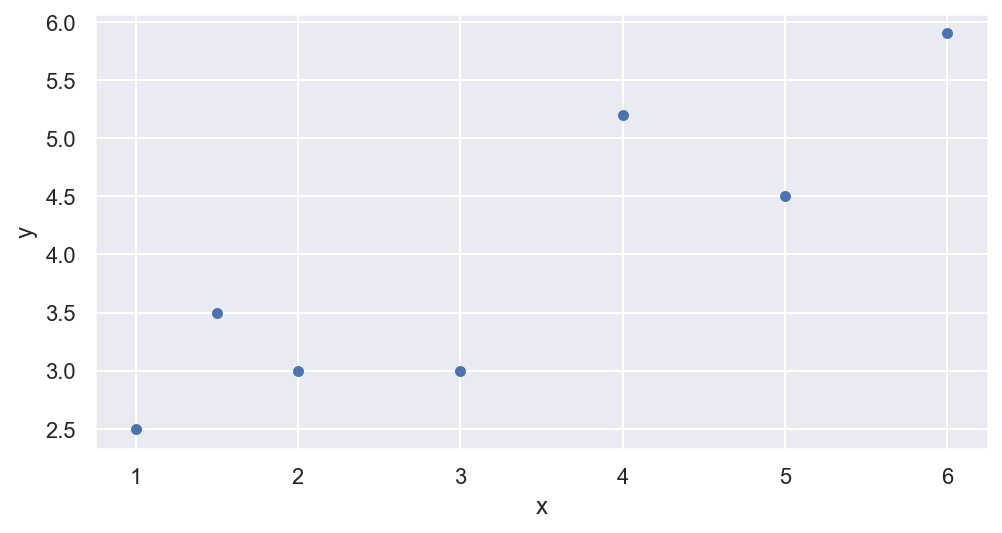

In [26]:
sample_data = [[1, 2.5], [1.5, 3.5], [2, 3.0],
               [3, 3], [4, 5.2], [5, 4.5], [6, 5.9]]
pd.DataFrame(sample_data, columns=['x','y']).plot(kind = 'scatter',
                 x='x', y='y', figsize=(8,4));

##### plotting relationship

In [27]:
df = pd.DataFrame(sample_data, columns=['x','y'])

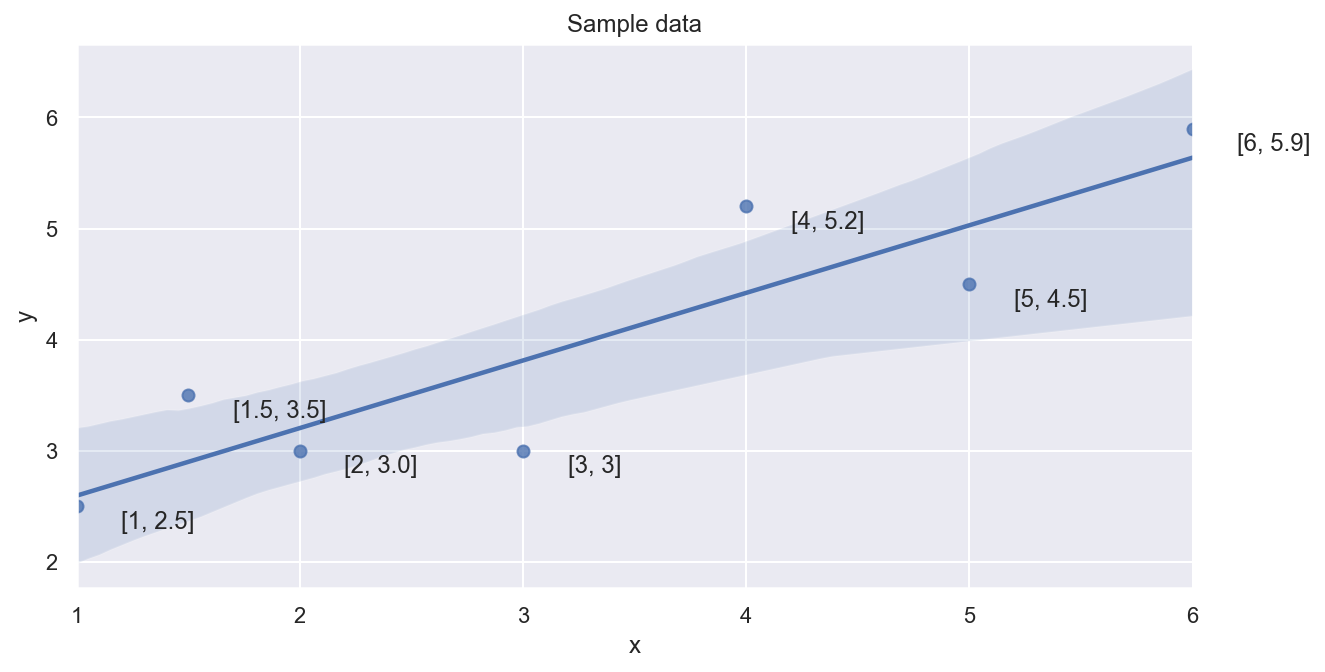

In [87]:
fig,ax = plt.subplots(figsize=(10,5))

for point in sample_data:
    ax.text(point[0] + 0.2, point[1] - 0.2, str(point))
sns.regplot(x='x', y='y', data=df, ax=ax)
ax.set_title('Sample data')
plt.show()

##### calculate by hand

In [38]:
list = [[1, 2.5], [1.5, 3.5], [2, 3.0], [3, 3], [4, 5.2], [5, 4.5], [6, 5.9]]
data = np.array(list)
# print(data)
df = pd.DataFrame( data, columns=['x','y'])
# print(df)
beta1 = np.corrcoef(df.y, df.x)[0][1]*df.y.std()/df.x.std() 
beta0 = df.y.mean() - beta1*df['x'].mean()
print("beta0:{} \nbeta1:{}".format(beta0, beta1))

beta0:1.9868600682593855 
beta1:0.6085324232081912


In [41]:
y_hat = [beta0+beta1*i for i in df['x']]
print(df['y'], np.round(y_hat, 1))

0    2.5
1    3.5
2    3.0
3    3.0
4    5.2
5    4.5
6    5.9
Name: y, dtype: float64 [2.6 2.9 3.2 3.8 4.4 5.  5.6]


In [42]:
residuals = df.y - y_hat
print(residuals)

0   -0.095392
1    0.600341
2   -0.203925
3   -0.812457
4    0.779010
5   -0.529522
6    0.261945
Name: y, dtype: float64


In [45]:
rss = sum([i**2 for i in residuals])
mse = rss/len(residuals)
print(rss, mse)

2.0270477815699666 0.28957825450999525


##### calculate beta0 , beta1 with sklearn, LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings

In [53]:
lr = LinearRegression()
lr.fit(np.array(df['x']).reshape(-1,1), df.y) # fit(df.x, df.y) report mistake
print(lr.intercept_, lr.coef_)

1.9868600682593858 [0.60853242]


In [55]:
predictions = [int(i) for i in lr.predict(np.array(df['x']).reshape(-1,1))]
print(predictions)

[2, 2, 3, 3, 4, 5, 5]


##### calculate beta0 , beta1 with 'linear_model'

In [57]:
from sklearn import linear_model

In [63]:
reg = linear_model.LinearRegression()
reg.fit(np.array(df['x']).reshape(-1,1), df['y'])
print(reg.intercept_, reg.coef_)

1.9868600682593858 [0.60853242]


##### compare df with df_lr

In [65]:
df_lr = pd.DataFrame(zip(df.x, predictions), columns=['xx', 'yy'])

In [69]:
df.join(df_lr)

,x,y,xx,yy
0,1.0,2.5,1.0,2
1,1.5,3.5,1.5,2
2,2.0,3.0,2.0,3
3,3.0,3.0,3.0,3
4,4.0,5.2,4.0,4
5,5.0,4.5,5.0,5
6,6.0,5.9,6.0,5


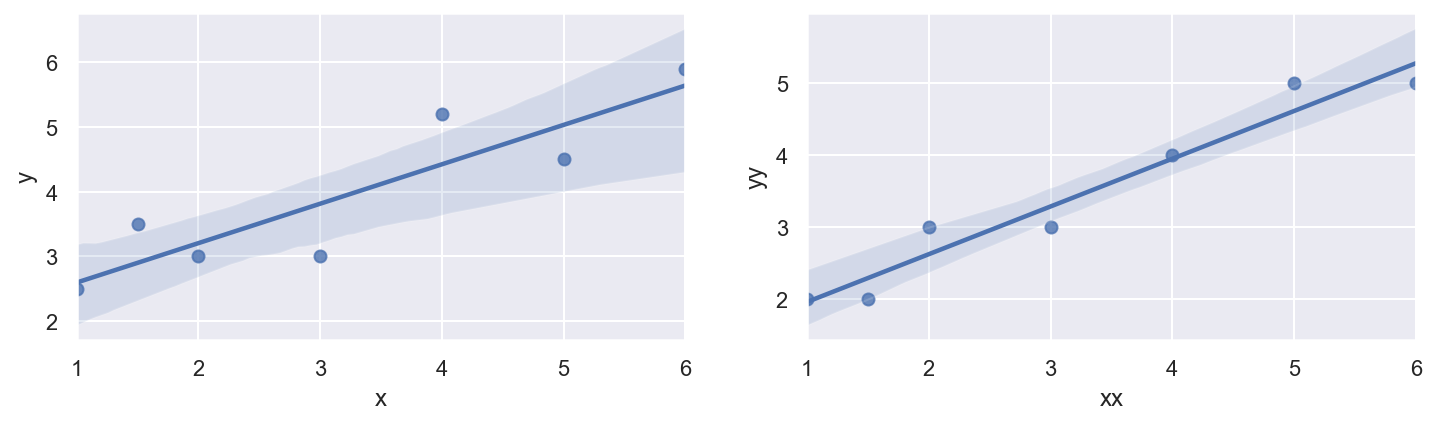

In [91]:
fig,ax = plt.subplots(1,2, figsize=(12,3))
sns.regplot(x=df['x'], y=df['y'], data=df, ax=ax[0])
sns.regplot(x=df_lr['xx'], y=df_lr['yy'], ax=ax[1])
plt.show()

### Generate some data and do it again

In [105]:
np.random.seed(1)
x = np.linspace(-5, 50, 100)
y = 50 + 2*x + np.random.normal(0,20, size=len(x))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


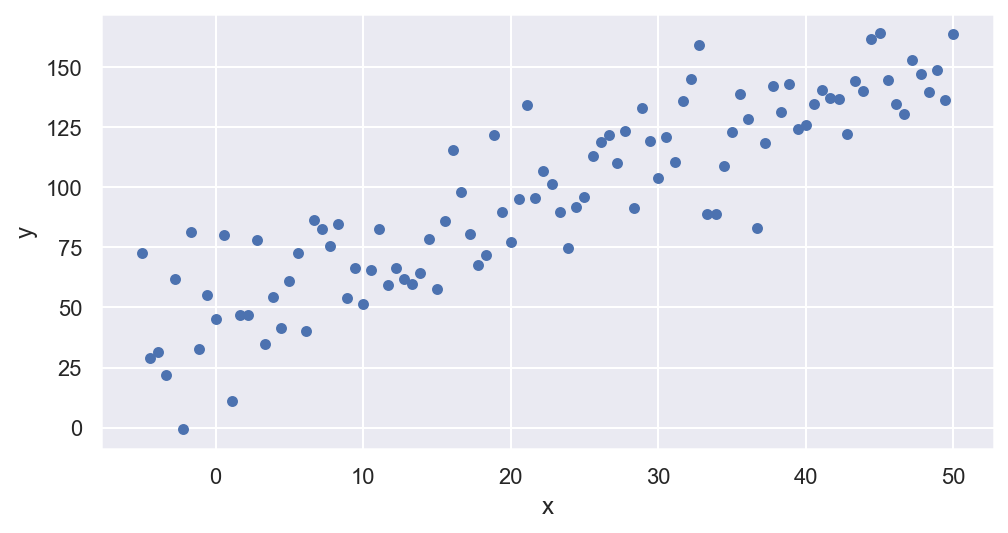

In [138]:
pd.DataFrame(zip(x,y), columns=['x','y']).plot(kind="scatter", x='x',
            y='y', figsize=(8,4))

#### Put the new data for x and y into a dataframe

In [171]:
df = pd.DataFrame({'x':x, 'y':y})
# print(df)

#### What is the baseline prediction for y?

In [174]:
df['base_y']=df.y.mean()
# print(df)

#### Plot the line for the baseline prediction together with a scatter plot of the data.

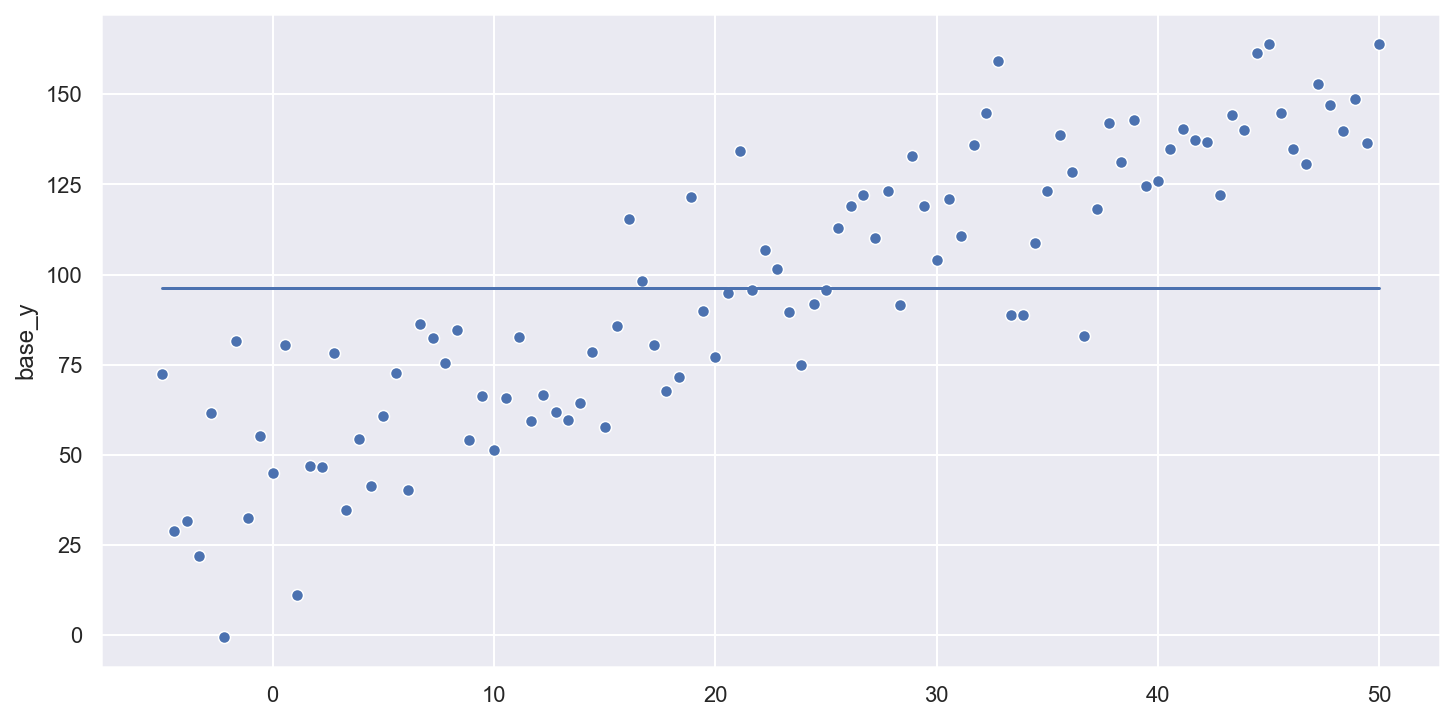

In [179]:
fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x=x, y=y, data=df)
sns.lineplot(x=x,y=df['base_y'], data=df)
plt.show()

#### Calculate the MSE for the baseline prediction.

In [201]:
df['mean_base_se']=sum(np.square(df.y-df.base_y)/len(df.x))
df.head()

,x,y,base_y,y_predict,y_difference,r_squr,mean_yhat_se,mean_base_se
0,-5.000000,72.486907,96.211657,37.903210,34.583697,1196.032088,1465.864724,1465.864724
1,-4.444444,28.875983,96.211657,39.081159,-10.205176,104.145617,1465.864724,1465.864724
2,-3.888889,31.658787,96.211657,40.259107,-8.600320,73.965505,1465.864724,1465.864724
3,-3.333333,21.873961,96.211657,41.437056,-19.563095,382.714677,1465.864724,1465.864724
4,-2.777778,61.752597,96.211657,42.615004,19.137593,366.247464,1465.864724,1465.864724


#####  calculate the model coefficients and calculate the mse with prediction line.

In [187]:
xmean = df.x.mean()
ymean = df.y.mean()
xstd = df.x.std()
ystd = df.y.std()
corr_xy = df.corr().iloc[0,1]
# print('xmean:{} , ymean:{}, xstd:{}, ystd:{}, corr:_xy{}'.format(xmean, 
#         ymean, xstd, ystd, corr_xy))

In [188]:
beta1 = corr_xy * ystd / xstd
beta0 = ymean - beta1 * xmean
# print('beta1:{}, beta0:{}'.format(beta1, beta0))

beta1:2.120307150115455, beta0:48.504746163916224


In [194]:
df['y_predict'] = beta0 + beta1 * df.x
df['y_difference'] = df['y'] - df['y_predict']
df['r_squr'] = df['y_difference'] ** 2
df.head()

,x,y,base_y,y_predict,y_difference,r_squr
0,-5.000000,72.486907,96.211657,37.903210,34.583697,1196.032088
1,-4.444444,28.875983,96.211657,39.081159,-10.205176,104.145617
2,-3.888889,31.658787,96.211657,40.259107,-8.600320,73.965505
3,-3.333333,21.873961,96.211657,41.437056,-19.563095,382.714677
4,-2.777778,61.752597,96.211657,42.615004,19.137593,366.247464


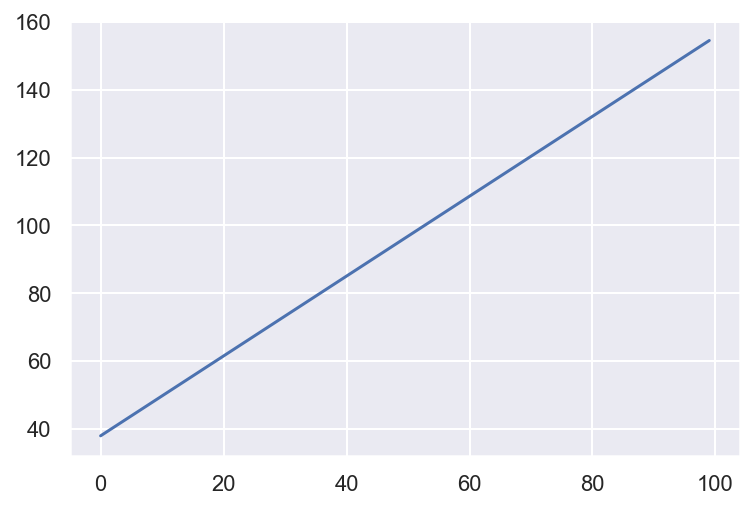

In [200]:
df.y_predict.plot()

In [203]:
df['mean_predict_se'] = np.square(df['y'] - df['y_predict']).mean()
# df